In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [36]:
#let's import 
import matplotlib.pyplot as plt
import seaborn as sns

# what to do

**A medical insurance company has released data for almost 1000 customers.create a model that predict the yearly medical cover cost.**


In [37]:
df = pd.read_csv(r"C:\Users\yash shukla\Downloads\Medicalpremium.csv" )

In [38]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [40]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

**so there is no null values**

In [41]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [42]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


# Data Visualization

Text(0.5, 1.0, 'histogramof PremiumPrice')

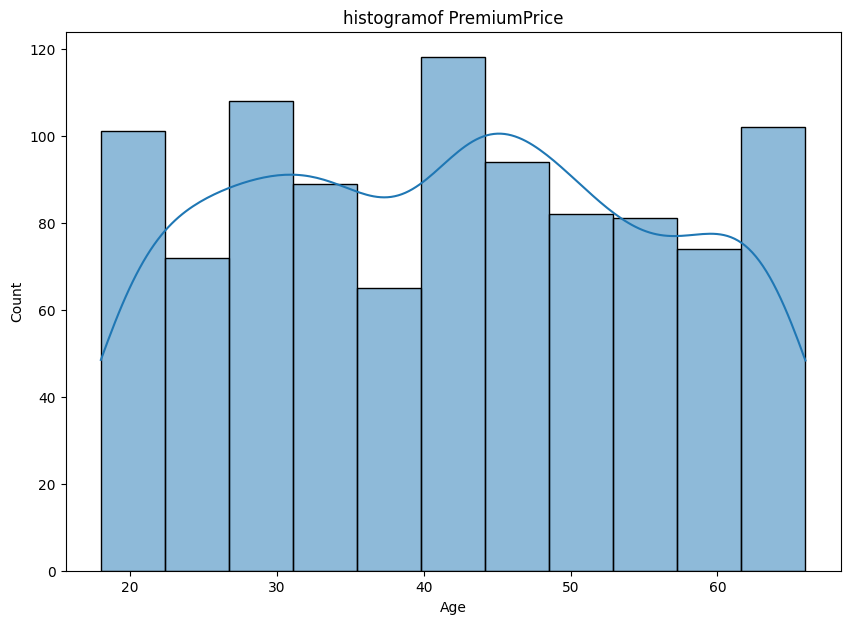

In [43]:
plt.figure(figsize=(10,7))
sns.histplot(df['Age'],kde=True)
plt.title('histogramof PremiumPrice')


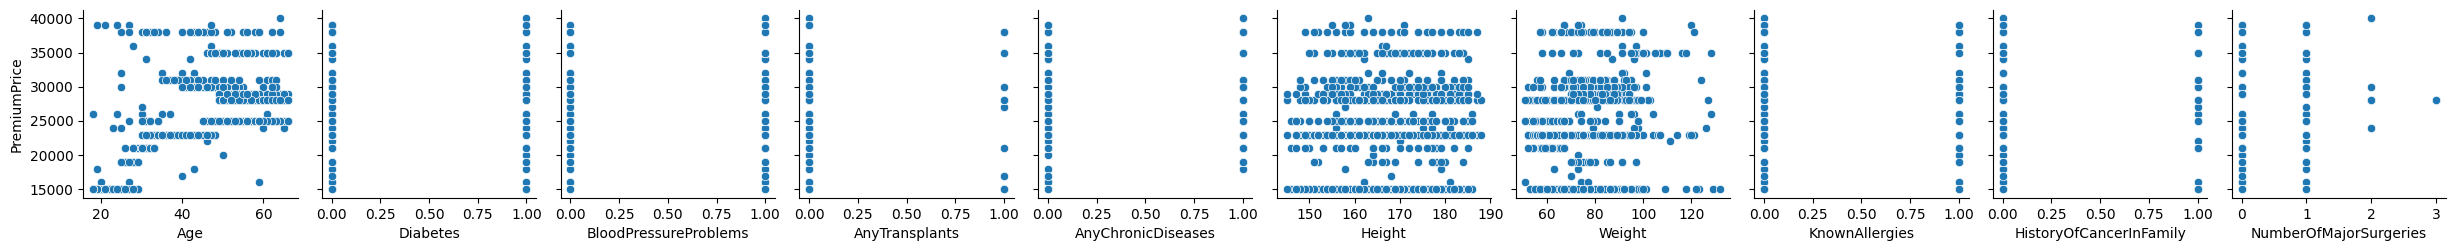

In [44]:

sns.pairplot(df, x_vars=['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'], y_vars=['PremiumPrice'], kind='scatter')

see the three column age and height, weight are more related to premiumPrice.

**let's calculate correlation**

how much each column correlated to the target column premiumprice


Text(0.5, 1.0, 'correlation matrix')

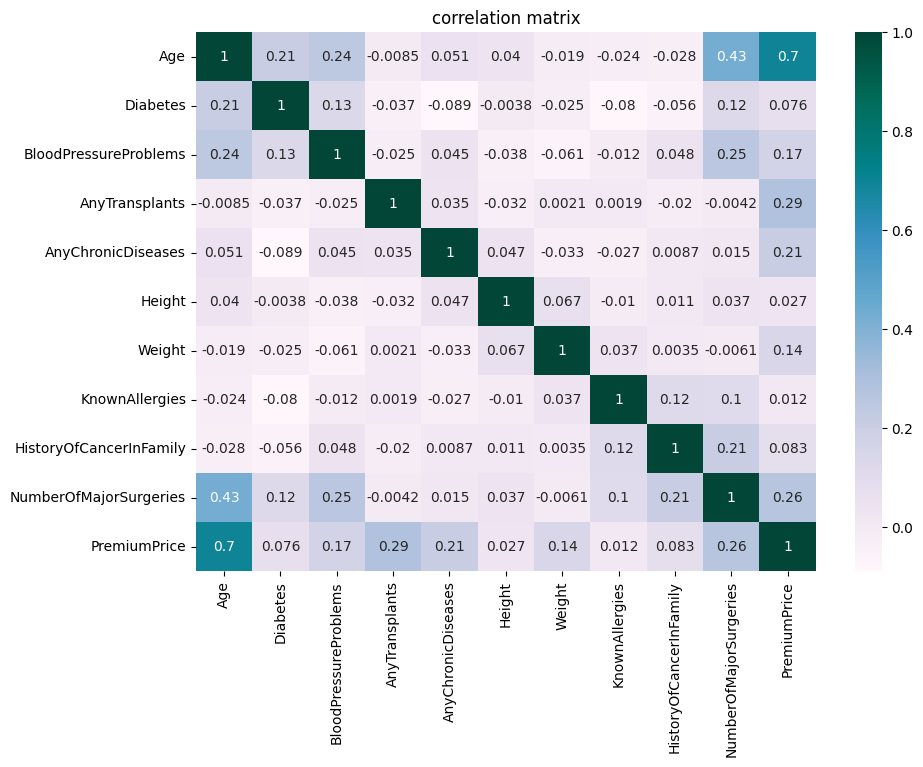

In [45]:
correlation = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, cmap='PuBuGn')
plt.title('correlation matrix')

so the heatmap shows that age is the most correlated column to the target column.

In [46]:
#let's split the data into X, and y variable
X = df.drop('PremiumPrice',axis=1)
y = df['PremiumPrice']

In [47]:
X

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1
3,52,1,1,0,1,183,93,0,0,2
4,38,0,0,0,1,166,88,0,0,1
...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0
982,64,1,1,0,0,153,70,0,0,3
983,56,0,1,0,0,155,71,0,0,1
984,47,1,1,0,0,158,73,1,0,1


In [48]:
y

0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64

# train the data

In [49]:
#split the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#import libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


# Creating Pipeline for preprocessing and model.

In [51]:
#create a pipeline for preprocessing and model
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('model',RandomForestRegressor())
])

In [52]:
#fit the pipeline on training data
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

Let's predict on the data

In [53]:
#predict on X_test
y_pred = pipeline.predict(X_test)

# Evaluate the model

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
print('Mean absolute error :',mae)
print('Mean squared error :',r2)
print('R^2 :', r2)

Mean absolute error : 1003.6363636363636
Mean squared error : 0.8792020069770446
R^2 : 0.8792020069770446


# Let's use the Hyperparameter Tuning to increase the model accuracy

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
#hyperparameter define 
param_grid = {
   'model__n_estimators': [50, 100, 200], 
    'model__max_depth': [None, 10, 20],  # Maximum depth of the trees
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'model__min_samples_leaf': [1, 2, 4]  # Minimum number of sample
    
}

In [57]:
# create a grid search object and pass pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

#get the best pamameter and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#predict on the test data
y_pred_2 = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred_2)
mae = mean_absolute_error(y_test, y_pred_2)
r2 = r2_score(y_test, y_pred_2)
print("Best Model Mean Squared Error:", mse)
print("Mean absolute error :",mae)
print("r2 :",r2)
print("Best Model Hyperparameters:", best_params)

Best Model Mean Squared Error: 4337254.864398394
Mean absolute error : 988.1472692845833
r2 : 0.8982886742036726
Best Model Hyperparameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 100}


# Conclusion

**overall the model perform better than the base model after hyperparameter tuning  the Mean absolute error is 1014 which is low and r^2 is around 90% so the model is performing good.**